<a href="https://colab.research.google.com/github/nsykhr/MA_compling/blob/master/05/bigartm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BigARTM installation

In [1]:
!apt-get --yes install git make cmake build-essential libboost-all-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.4ubuntu1).
make is already the newest version (4.1-9.1ubuntu1).
make set to manually installed.
libboost-all-dev is already the newest version (1.65.1.0ubuntu1).
cmake is already the newest version (3.10.2-1ubuntu2.18.04.1).
git is already the newest version (1:2.17.1-1ubuntu0.5).
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.


In [2]:
!pip install protobuf tqdm wheel

In [3]:
!git clone --branch=stable https://github.com/bigartm/bigartm.git

Cloning into 'bigartm'...
remote: Enumerating objects: 29, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 16526 (delta 11), reused 16 (delta 5), pack-reused 16497
Receiving objects: 100% (16526/16526), 17.16 MiB | 23.19 MiB/s, done.
Resolving deltas: 100% (11554/11554), done.


In [5]:
cd bigartm

/content/bigartm


In [0]:
mkdir build

In [7]:
cd build

/content/bigartm/build


In [8]:
!cmake ..

-- The C compiler identification is GNU 7.4.0
-- The CXX compiler identification is GNU 7.4.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Build type: Release
-- Looking for include file unistd.h
-- Looking for include file unistd.h - found
-- Boost version: 1.65.1
-- Looking for pthread.h
-- Looking for pthread.h - found
-- Looking for pthread_create
-- Looking for pthread_create - not found
-- Looking for pthread_create in pthreads
-- Looking for pthread_create in pthreads - not found
-- Looking for pthread_create in pthread
-- Lookin

In [9]:
!make

Scanning dependencies of target libprotobuf
[  0%] Building CXX object 3rdparty/protobuf-3.0.0/cmake/CMakeFiles/libprotobuf.dir/__/src/google/protobuf/arena.cc.o
[  0%] Building CXX object 3rdparty/protobuf-3.0.0/cmake/CMakeFiles/libprotobuf.dir/__/src/google/protobuf/arenastring.cc.o
[  1%] Building CXX object 3rdparty/protobuf-3.0.0/cmake/CMakeFiles/libprotobuf.dir/__/src/google/protobuf/extension_set.cc.o
[  1%] Building CXX object 3rdparty/protobuf-3.0.0/cmake/CMakeFiles/libprotobuf.dir/__/src/google/protobuf/generated_message_util.cc.o
[  1%] Building CXX object 3rdparty/protobuf-3.0.0/cmake/CMakeFiles/libprotobuf.dir/__/src/google/protobuf/io/coded_stream.cc.o
[  2%] Building CXX object 3rdparty/protobuf-3.0.0/cmake/CMakeFiles/libprotobuf.dir/__/src/google/protobuf/io/zero_copy_stream.cc.o
[  2%] Building CXX object 3rdparty/protobuf-3.0.0/cmake/CMakeFiles/libprotobuf.dir/__/src/google/protobuf/io/zero_copy_stream_impl_lite.cc.o
[  2%] Building CXX object 3rdparty/protobuf-3.0.0/

In [10]:
!pip install python/bigartm*.whl -U

Processing ./python/bigartm-0.10.0-cp36-cp36m-linux_x86_64.whl


In [11]:
cd ../..

/content


In [12]:
!pip install pymorphy2[fast] nltk gensim

     |████████████████████████████████| 51kB 1.7MB/s 
     |████████████████████████████████| 7.1MB 5.9MB/s 
     |████████████████████████████████| 256kB 50.0MB/s 
  Created wheel for DAWG: filename=DAWG-0.7.8-cp36-cp36m-linux_x86_64.whl size=771521 sha256=93a90b6bd13a49f94e54d85e35c2a54a9efd894337c9b7ecc881e4db37562a61
  Stored in directory: /root/.cache/pip/wheels/d4/88/d0/4e4abc83eb8f59a71e8dbd8ba99fd5615a3af1fac1ef7f8825
Successfully built DAWG


# Data

In [0]:
import re
import artm
import gensim
import string
from tqdm import tqdm
from collections import Counter
from nltk.corpus import stopwords
from pymorphy2 import MorphAnalyzer
from nltk.tokenize import word_tokenize

import matplotlib.pyplot as plt
%matplotlib inline

morph = MorphAnalyzer()

In [15]:
nltk.download('punkt');nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
# Let's augment the stopword set with some Python syntax, numbers, two types of a long dash, and some random stopwords.
stops = set(stopwords.words('russian')) | {'gt', 'from', 'import', 'and', 'or', 'is', 'in',
                                           'if', 'for', 'while', 'none', 'null', 'return', 'yield',
                                           'break', 'pass', 'continue', 'int'} | \
                                            set(map(str, range(10))) | \
                                            {'–', '—', 'очень', 'n', 'a', 'x'}

def remove_tags(text):
    return re.sub(r'<[^>]+>', '', text)

def opt_normalize(texts, top=50000):
    unique = Counter()
    for text in texts:
        unique.update(text)
    
    norm_unique = {word: morph.parse(word)[0].normal_form for word, _ in unique.most_common(top)}
    
    norm_texts = []
    for text in texts:
        norm_words = [norm_unique.get(word) for word in text]
        norm_words = [word for word in norm_words if word and word not in stops]
        norm_texts.append(norm_words)
        
    return norm_texts

def tokenize(text):
    # For tokenization let's use the word_tokenize function from nltk.
    words = [word.strip(string.punctuation) for word in word_tokenize(text)]
    words = [word for word in words if word]
    
    return words

In [17]:
!wget https://github.com/mannefedov/compling_nlp_hse_course/raw/master/data/habr_texts.txt.zip

--2020-02-04 12:42:56--  https://github.com/mannefedov/compling_nlp_hse_course/raw/master/data/habr_texts.txt.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mannefedov/compling_nlp_hse_course/master/data/habr_texts.txt.zip [following]
--2020-02-04 12:42:56--  https://raw.githubusercontent.com/mannefedov/compling_nlp_hse_course/master/data/habr_texts.txt.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18645068 (18M) [application/zip]
Saving to: ‘habr_texts.txt.zip’

habr_texts.txt.zip  100%[===================>]  17.78M   107MB/s    in 0.2s    

2020-02-04 12:42:56 (107 MB/s) - ‘habr_texts.tx

In [18]:
!unzip habr_texts.txt.zip

Archive:  habr_texts.txt.zip
  inflating: habr_texts.txt          


In [0]:
texts = open('habr_texts.txt').read().splitlines()
texts = opt_normalize([tokenize(remove_tags(text.lower())) for text in texts])

In [0]:
ph = gensim.models.Phrases(texts, scoring='npmi', threshold=0.3)
p = gensim.models.phrases.Phraser(ph)
ngrammed_texts = p[texts]

In [21]:
ngrammed_texts[0][:25]

['masstransit',
 'это',
 'open_source',
 'библиотека',
 'разработать',
 'язык_c',
 'net',
 'платформа',
 'работа',
 'шина',
 'дать',
 'который',
 'использоваться',
 'построение_распределенный',
 'приложение',
 'реализация',
 'soa',
 'service',
 'oriented',
 'architecture',
 'качество',
 'message',
 'мочь',
 'выступать',
 'rabbitmq']

Some meaningful n-grams have emerged: "open\_source", "язык\_C", "построение\_распределенный".

In [0]:
with open('habr_texts.vw', 'w') as f:
  for i, text in enumerate(ngrammed_texts):
      c = Counter(text)
      doc = 'doc_'+ str(i) + ' '
      vw_text = ' '.join([x+':'+str(c[x]) for x in c if ':' not in x])
      f.write(doc + vw_text  + '\n')

# Model training

In [0]:
def print_measures(model_artm):
    print('Sparsity Phi: {0:.3f} ARTM)'.format(
        model_artm.score_tracker['SparsityPhiScore'].last_value)
)
    print('Sparsity Theta: {0:.3f} (ARTM)'.format(
        model_artm.score_tracker['SparsityThetaScore'].last_value))

    print('Kernel contrast: {0:.3f} (ARTM)'.format(
        model_artm.score_tracker['TopicKernelScore'].last_average_contrast))

    print('Kernel purity: {0:.3f} (ARTM)'.format(
        model_artm.score_tracker['TopicKernelScore'].last_average_purity))

    print('Perplexity: {0:.3f} (ARTM)'.format(
        model_artm.score_tracker['PerplexityScore'].last_value)
)
    plt.plot(range(model_artm.num_phi_updates), model_artm.score_tracker['PerplexityScore'].value, 'r--', linewidth=2)
    plt.xlabel('Iterations count')
    plt.ylabel(' ARTM perp. (red)')
    plt.grid(True)
    plt.show()

In [0]:
batch_vectorizer = artm.BatchVectorizer(data_path='habr_texts.vw',
                                        data_format='vowpal_wabbit',
                                        target_folder='batches',
                                        batch_size=1000)

In [0]:
batch_vectorizer = artm.BatchVectorizer(data_path='batches',
                                        data_format='batches')

In [29]:
dictionary = artm.Dictionary()
dictionary.gather(data_path='batches')
dictionary.filter(class_id='@default_class',
                  min_df=40, max_df=2000)

artm.Dictionary(name=10587989-e45c-4f9e-bf41-b753267268dd, num_entries=5735)

In [0]:
dictionary.save_text('dict.txt')
# dictionary = artm.Dictionary()
# dictionary.load_text('dict.txt')

In [0]:
TOPIC_NAMES = ['topic_{}'.format(i) for i in range(200)]

model_artm = artm.ARTM(topic_names=TOPIC_NAMES,
                       regularizers=[
                           artm.DecorrelatorPhiRegularizer(
                                            name='Decorr', tau=0.25,
                                            class_ids=['@default_class'],
                                            topic_names=TOPIC_NAMES),
                           artm.SmoothSparsePhiRegularizer(
                                            name='SmoothPhi_1',
                                            class_ids=['@default_class'],
                                            tau=0.15,
                                            topic_names=TOPIC_NAMES)
                                    ]
                        )

In [0]:
model_artm.initialize(dictionary=dictionary)

In [0]:
model_artm.scores.add(artm.PerplexityScore(name='PerplexityScore',
                                           dictionary=dictionary))
model_artm.scores.add(artm.SparsityPhiScore(name='SparsityPhiScore'))
model_artm.scores.add(artm.SparsityThetaScore(name='SparsityThetaScore'))
model_artm.scores.add(artm.TopicKernelScore(name='TopicKernelScore', probability_mass_threshold=0.1))
model_artm.scores.add(artm.TopTokensScore(class_id='@default_class', name='TopTokensScore_1', num_tokens=10))

In [0]:
model_artm.num_document_passes = 2
model_artm.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=10)

Sparsity Phi: 0.000 ARTM)
Sparsity Theta: 0.000 (ARTM)
Kernel contrast: 0.012 (ARTM)
Kernel purity: 0.010 (ARTM)
Perplexity: 198.227 (ARTM)


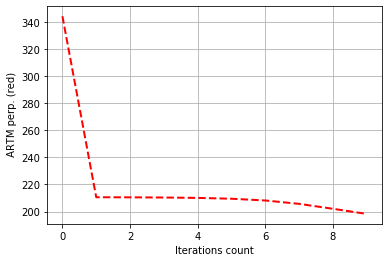

In [57]:
print_measures(model_artm)

In [0]:
model_artm.regularizers.add(artm.SmoothSparsePhiRegularizer(name='SparsePhi', tau=-0.15, 
                                                            topic_names=TOPIC_NAMES,
                                                            ))
model_artm.regularizers.add(artm.SmoothSparseThetaRegularizer(name='SparseTheta', tau=-0.15, 
                                                              topic_names=TOPIC_NAMES))

In [0]:
model_artm.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=1)

In [60]:
phi_tau = model_artm.regularizers['SparsePhi'].tau
theta_tau = model_artm.regularizers['SparseTheta'].tau

for i in tqdm(range(29)):
    model_artm.regularizers['SparsePhi'].tau = phi_tau*1.5
    model_artm.regularizers['SparseTheta'].tau = theta_tau*1.25
    model_artm.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=1)

100%|██████████| 29/29 [02:14<00:00,  4.63s/it]


Sparsity Phi: 0.896 ARTM)
Sparsity Theta: 0.317 (ARTM)
Kernel contrast: 0.334 (ARTM)
Kernel purity: 0.623 (ARTM)
Perplexity: 119.004 (ARTM)


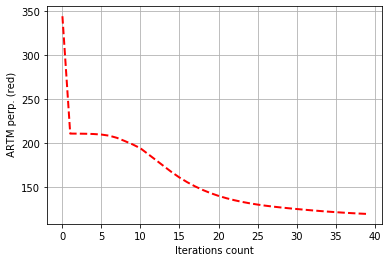

In [61]:
print_measures(model_artm)

Hyperparameters and the training process:

1. The initial training was done using DecorrelatorPhiRegularizer with tau=0.25 and SmoothSparsePhiRegularizer with tau=0.15. 10 collection passes. Perplexion reached a plateau after the first pass, but then it continued to decrease after the sixth one.
2. The obtained value of perplexion is 198.227.
3. After that, two more regularizers were added: SmoothSparsePhiRegularizer and SmoothSparseThetaRegularizer. We started with tau values of -0.15 and gradually decreased them during 29 more iterations. On each iteration, and there were 30 of them in total, one collection pass was done. Perplexion kept decreasing during every iteration, first quickly, but more and more smoothly after that.
4. The obtained value of perplexion is 119.004.
5. The other metrics increased from around zero to the values you can observe in the cell above.

# Nice topics

In [64]:
# I chose four topics in the beginning of the list: computer hardware, education, business relations, HTML.

for topic_name in ['topic_1', 'topic_2', 'topic_7', 'topic_8']:
    print(topic_name + ': ')
    for x in model_artm.score_tracker['TopTokensScore_1'].last_tokens[topic_name]:
        print(x)
    print('---------')

topic_1: 
компьютер
ноутбук
intel
пк
жёсткий_диск
линейка
ггц
процессор
гб
lenovo
---------
topic_2: 
книга
курс
знание
студент
лекция
изучение
изучать
прочитать
научиться
знакомство
---------
topic_7: 
требование
заказчик
срок
тз
контракт
исполнитель
выполнить
договор
ожидание
требовать
---------
topic_8: 
страница
ссылка
браузер
заголовок
html
картинка
просмотр
url
загрузка
page
---------
